# 🧪 NumPy + OpenCV Lab: Vision Tasks with Pacman
In this lab, you'll practice using NumPy and OpenCV to manipulate images, extract visual features, and overlay simple effects.

## Lab Goals
- Isolate red/yellow regions in an image and draw contours.
- Detect and count blobs (shapes) above a certain size.
- Replace the largest red object with a Pacman face overlay.

⚠️ Make sure you have the following installed:
```bash
pip install numpy opencv-python matplotlib
```


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_img(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

## 📥 Load Image
Replace `'your_image.jpg'` with the path to your Pacman image.

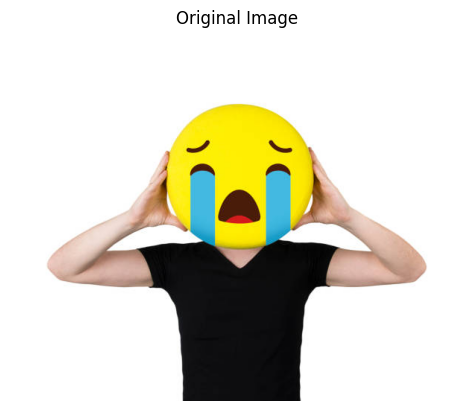

In [35]:
img = cv2.imread('sad_man.jpg')
if img is None:
    raise ValueError("Image not found. Please check the path.")
show_img(img, "Original Image")

## 🎯 Task 1: Color Tracker – Red and Yellow
- Use HSV color space to isolate red and yellow.
- Draw contours around the detected regions.

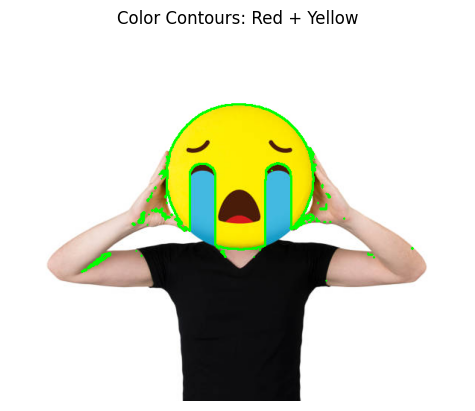

In [36]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Red mask (two ranges due to HSV wraparound)
mask1 = cv2.inRange(hsv, (0, 100, 100), (10, 255, 255))
mask2 = cv2.inRange(hsv, (160, 100, 100), (179, 255, 255))
red_mask = mask1 | mask2

# Yellow mask
yellow_mask = cv2.inRange(hsv, (20, 100, 100), (40, 255, 255))

# Combine
combined_mask = red_mask | yellow_mask

# Find contours
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)
show_img(img_contours, "Color Contours: Red + Yellow")

## 🧮 Task 2: Shape Counter – Count Large Blobs

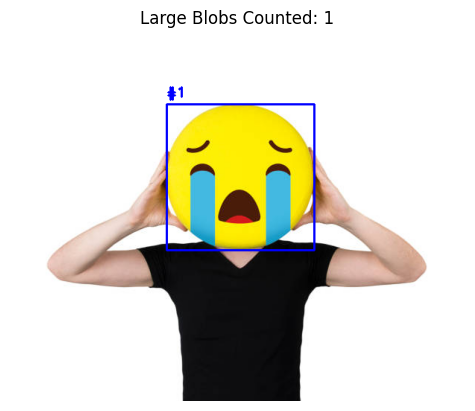

In [37]:
min_area = 500
img_blobs = img.copy()
count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_area:
        count += 1
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_blobs, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img_blobs, f"#{count}", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

show_img(img_blobs, f"Large Blobs Counted: {count}")

## 🍒 Task 3: Replace Largest Red Object with Pacman
Overlay a Pacman face PNG on the largest red contour.

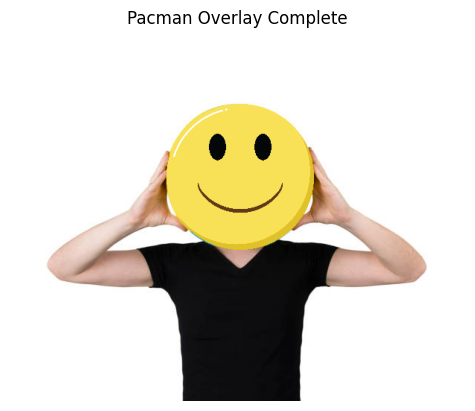

In [39]:
# 3. Find the largest red object
max_area = 0
target_cnt = None
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > max_area:
        max_area = area
        target_cnt = cnt

# 4. Load Pacman image
overlay = cv2.imread("smile_emoji.png", cv2.IMREAD_UNCHANGED)  # must be RGBA
if overlay is None:
    raise ValueError("Pacman overlay image not found")

# 5. Overlay Pacman if target found
if target_cnt is not None:
    x, y, w, h = cv2.boundingRect(target_cnt)

    # Resize overlay to bounding box size
    overlay_resized = cv2.resize(overlay, (w, h))
    b, g, r, a = cv2.split(overlay_resized)
    overlay_rgb = cv2.merge((b, g, r))
    mask = a / 255.0  # normalize alpha to [0, 1]
    mask_3ch = np.stack([mask]*3, axis=-1)
    # Extract region of interest (ROI) from background
    roi = img[y:y+h, x:x+w].astype(float)
    composite = (roi * (1 - mask_3ch) + overlay_rgb * mask_3ch).astype(np.uint8)

    # Put composite back into image
    img[y:y+h, x:x+w] = composite

# 6. Show result
show_img(img, "Pacman Overlay Complete")


## 🧮 NumPy Add-on Task 1: Brightness Grid (Sensor Simulation)
Use NumPy slicing and averaging to simulate a grid of brightness sensors.

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tile_h, tile_w = gray.shape[0] // 3, gray.shape[1] // 3

avg_grid = np.zeros((3, 3))

for i in range(3):
    for j in range(3):
        region = gray[i*tile_h:(i+1)*tile_h, j*tile_w:(j+1)*tile_w]
        avg_grid[i, j] = np.mean(region)

print("Average brightness in 3x3 grid:")
print(avg_grid)

Average brightness in 3x3 grid:
[[254.99952466 237.56289364 254.99441474]
 [227.89129531 159.44691028 224.81996435]
 [249.40787285  54.03012478 249.18775995]]


## 🎛️ NumPy Add-on Task 2: Invert the Image
Use NumPy math to invert all pixel values.

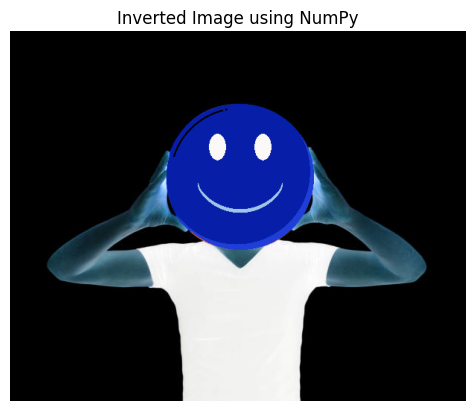

In [41]:
inverted = 255 - img
show_img(inverted, "Inverted Image using NumPy")

## 📏 NumPy Add-on Task 3: Distance Between Blob Centroids
Calculate Euclidean distance between the first two blob centers.

In [ ]:
from numpy.linalg import norm

def get_centroid(cnt):
    M = cv2.moments(cnt)
    if M['m00'] == 0:
        return np.array([0, 0])
    return np.array([int(M['m10']/M['m00']), int(M['m01']/M['m00'])])

centroids = [get_centroid(c) for c in contours]
if len(centroids) >= 2:
    d = norm(centroids[0] - centroids[1])
    print(f"Distance between first two blobs: {d:.2f} pixels")
else:
    print("Not enough blobs detected.")

In [ ]:
# Load overlay image with transparency
overlay = cv2.imread('pacman_face.png', cv2.IMREAD_UNCHANGED)  # must be RGBA
if overlay is None:
    raise ValueError("Pacman overlay image not found.")

# Find largest red object
max_area = 0
target_cnt = None
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > max_area:
        max_area = area
        target_cnt = cnt

if target_cnt is not None:
    x, y, w, h = cv2.boundingRect(target_cnt)
    resized_overlay = cv2.resize(overlay, (w, h))
    b, g, r, a = cv2.split(resized_overlay)
    overlay_rgb = cv2.merge((b, g, r))
    mask = cv2.merge((a, a, a)) / 255.0

    roi = img[y:y+h, x:x+w].astype(float)
    composite = (roi * (1 - mask) + overlay_rgb * mask).astype(np.uint8)
    img[y:y+h, x:x+w] = composite

show_img(img, "Pacman Overlay Complete")

## 📈 NumPy + OpenCV Bonus: Contrast Enhancement Lab
Improve the visibility of features by adjusting the image contrast using histogram equalization techniques.

### 1. ✅ Global Histogram Equalization (Grayscale Only)
Useful for evenly boosting contrast across the whole image.

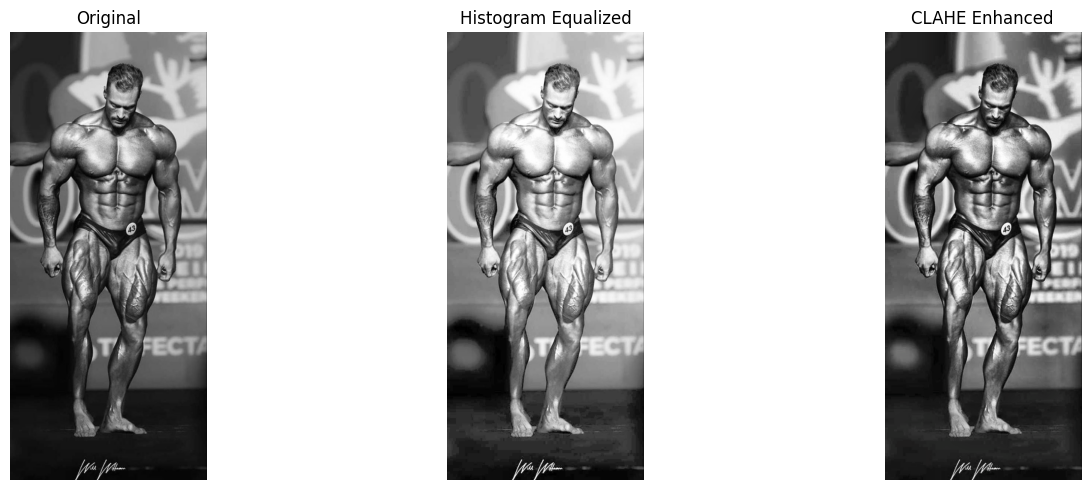

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("cbum.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(gray)

# CLAHE processing
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl = clahe.apply(l)
merged = cv2.merge((cl, a, b))
enhanced = cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

# Plot
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
eq_rgb = cv2.cvtColor(equalized, cv2.COLOR_GRAY2RGB)
clahe_rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 5))
titles = ["Original", "Histogram Equalized", "CLAHE Enhanced"]
images = [img_rgb, eq_rgb, clahe_rgb]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
